In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import calculos
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
from scipy.optimize import minimize

import warnings

# Suprimir todos os RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Codigo

In [171]:
ativo = ['ABEV3.SA', 'B3SA3.SA',
         'BBAS3.SA', 'BBDC3.SA',
         'BPAN4.SA', 'BRAP4.SA',
         'BRFS3.SA', 'CIEL3.SA',
         'CMIG4.SA', 'CPLE6.SA',
         'CSAN3.SA', 'CVCB3.SA',
         'ECOR3.SA', 'EGIE3.SA',
         'ELET3.SA', 'EMBR3.SA',
         'GOLL4.SA', 'ITSA4.SA', 
         'ITUB4.SA', 'MRVE3.SA',
         'MULT3.SA', 'PETR3.SA',
         'RENT3.SA', 'SBSP3.SA',
         'SLCE3.SA', 'SUZB3.SA',
         'TIMS3.SA', 'UGPA3.SA',
         'USIM5.SA', "VALE3.SA"]
data_inicio = "2010-01-01"
data_fim = "2023-10-31"

dados_ativo_bruto = yf.download(ativo, start=data_inicio, end=data_fim)

[*********************100%%**********************]  30 of 30 completed


In [172]:
dados_ativo = dados_ativo_bruto['Adj Close']

In [173]:
dados_ativo.index = np.array(dados_ativo.index, dtype='datetime64[D]')
dados_ativo

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,MULT3.SA,PETR3.SA,RENT3.SA,SBSP3.SA,SLCE3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA
2010-01-04,3.828887,7.681452,12.111359,5.228091,8.665876,13.543736,20.607105,4.349833,2.949659,1.582913,...,8.369338,14.180113,3.915931,7.681499,3.450042,13.398164,4.906016,5.798415,19.794643,24.706106
2010-01-05,3.851411,7.711112,11.989834,5.156086,9.040529,13.816683,20.823120,4.319548,2.994793,1.584982,...,8.332084,14.095003,3.968146,7.692811,3.471078,13.398164,5.261326,5.798415,19.852858,24.936422
2010-01-06,3.890701,8.001758,12.006041,5.125715,9.236001,14.010168,21.106646,4.308537,2.938380,1.592017,...,8.443843,14.234587,4.277403,7.690549,3.647789,13.398164,5.192999,5.798415,19.833452,25.464228
2010-01-07,3.908968,8.191574,12.010088,5.113904,9.480339,14.165643,20.976133,4.410401,2.910168,1.576706,...,8.406591,14.149474,4.096666,7.568369,3.744558,13.398164,5.076838,5.798415,20.019760,25.569792
2010-01-08,3.901462,8.001758,12.078947,5.120651,9.610653,14.372945,21.061640,4.355339,2.907347,1.582913,...,8.034068,14.043934,4.134821,7.695076,3.975962,13.398164,5.022175,5.798415,19.736423,25.819298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,12.490000,11.150000,49.340000,12.450000,7.610000,20.650000,10.790000,3.630000,11.810000,8.350000,...,24.240000,40.810001,51.000000,59.439999,36.270000,54.900002,15.190000,19.809999,5.950000,62.680000
2023-10-23,12.480000,11.310000,49.270000,12.460000,7.660000,20.690001,10.990000,3.660000,11.910000,8.370000,...,24.920000,38.349998,51.720001,61.139999,36.500000,54.400002,15.170000,19.730000,5.930000,62.560001
2023-10-24,12.520000,11.600000,49.040001,12.490000,7.690000,21.170000,11.100000,3.550000,11.930000,8.400000,...,25.590000,38.939999,52.610001,60.709999,36.849998,52.509998,15.250000,19.900000,5.970000,63.990002
2023-10-25,12.440000,11.540000,49.049999,12.410000,7.490000,20.920000,11.130000,3.440000,11.850000,8.290000,...,25.129999,39.049999,51.360001,60.070000,36.919998,52.599998,15.190000,20.170000,5.870000,63.930000


In [175]:
def entropia_periodo(df, periodos):
    results = {}
    for idx_periodo_inicial in range(len(periodos)-1):
        periodo_final = periodos[idx_periodo_inicial]
        periodo_inicial = periodos[idx_periodo_inicial] - pd.DateOffset(months=3)
        try:
            serie_analisada = df[(df.index > periodo_inicial) & (df.index < periodo_final)].dropna()
            serie_retornos = serie_analisada.pct_change().dropna()
            results.update({periodo_inicial:
            Operacoes.aproximacao_entropia(serie_retornos.values)
            })
        except:
            results.update({periodo_inicial: None})
            continue
            

    return results      

In [176]:
periodo_divisao = pd.DateOffset(months=1)
periodos = [dados_ativo.dropna().index[0] + pd.DateOffset(months=3)]
periodo = periodos[0]
while periodo < dados_ativo.index[-1]:
    periodo = periodos[-1] + periodo_divisao
    periodos.append(periodo)
periodos = periodos[:-1]

In [177]:
dados_ativo

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,MULT3.SA,PETR3.SA,RENT3.SA,SBSP3.SA,SLCE3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA
2010-01-04,3.828887,7.681452,12.111359,5.228091,8.665876,13.543736,20.607105,4.349833,2.949659,1.582913,...,8.369338,14.180113,3.915931,7.681499,3.450042,13.398164,4.906016,5.798415,19.794643,24.706106
2010-01-05,3.851411,7.711112,11.989834,5.156086,9.040529,13.816683,20.823120,4.319548,2.994793,1.584982,...,8.332084,14.095003,3.968146,7.692811,3.471078,13.398164,5.261326,5.798415,19.852858,24.936422
2010-01-06,3.890701,8.001758,12.006041,5.125715,9.236001,14.010168,21.106646,4.308537,2.938380,1.592017,...,8.443843,14.234587,4.277403,7.690549,3.647789,13.398164,5.192999,5.798415,19.833452,25.464228
2010-01-07,3.908968,8.191574,12.010088,5.113904,9.480339,14.165643,20.976133,4.410401,2.910168,1.576706,...,8.406591,14.149474,4.096666,7.568369,3.744558,13.398164,5.076838,5.798415,20.019760,25.569792
2010-01-08,3.901462,8.001758,12.078947,5.120651,9.610653,14.372945,21.061640,4.355339,2.907347,1.582913,...,8.034068,14.043934,4.134821,7.695076,3.975962,13.398164,5.022175,5.798415,19.736423,25.819298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,12.490000,11.150000,49.340000,12.450000,7.610000,20.650000,10.790000,3.630000,11.810000,8.350000,...,24.240000,40.810001,51.000000,59.439999,36.270000,54.900002,15.190000,19.809999,5.950000,62.680000
2023-10-23,12.480000,11.310000,49.270000,12.460000,7.660000,20.690001,10.990000,3.660000,11.910000,8.370000,...,24.920000,38.349998,51.720001,61.139999,36.500000,54.400002,15.170000,19.730000,5.930000,62.560001
2023-10-24,12.520000,11.600000,49.040001,12.490000,7.690000,21.170000,11.100000,3.550000,11.930000,8.400000,...,25.590000,38.939999,52.610001,60.709999,36.849998,52.509998,15.250000,19.900000,5.970000,63.990002
2023-10-25,12.440000,11.540000,49.049999,12.410000,7.490000,20.920000,11.130000,3.440000,11.850000,8.290000,...,25.129999,39.049999,51.360001,60.070000,36.919998,52.599998,15.190000,20.170000,5.870000,63.930000


In [178]:
# def portfolio_tangente(df, rf, cov = None):
#     retornos = df
#     media_ret =  np.mean(retornos,axis=0)
#     if not cov:
#         cov = np.corrcoef(retornos, rowvar=False)
# 
#     inv_cov = np.linalg.inv(cov)
# 
#     ones = np.ones(len(media_ret))
# 
#     numerator = np.dot(inv_cov, (media_ret - rf * ones))
# 
#     denominator = np.dot(ones, np.dot(inv_cov, (media_ret - rf * ones)))
# 
#     weights_tangente = numerator / denominator
# 
#     return weights_tangente


In [179]:
def risk_portfolio(pesos, cov):
    return pesos @ cov @ pesos.T
    
    
def return_portfolio(pesos, retornos_esperado):
    return pesos @ retornos_esperado.T
    

In [180]:
def portfolio_tangente(returns_df, risk_free_rate, cov_matrix = None):
 
    returns = returns_df.values

    if cov_matrix is None:
        cov_matrix = returns_df.cov().values

    num_assets = len(returns_df.columns)

    def negative_sharpe_ratio(weights):
        portfolio_return = np.sum(returns.mean() * weights)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
        return -sharpe_ratio

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    bounds = tuple((0, .2) for asset in range(num_assets))

    initial_guess = num_assets * [1. / num_assets]

    result = minimize(negative_sharpe_ratio, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    tangency_weights = result.x

    return tangency_weights


In [181]:
def minimum_variance_portfolio(df, cov=None):
    retornos = df.to_numpy() 

    if cov is None:
        cov = np.cov(retornos, rowvar=False)

    inv_cov = np.linalg.inv(cov)

    ones = np.ones(len(df.columns))

    denominator = np.dot(ones, np.dot(inv_cov, ones))

    weights_min_variance = np.dot(inv_cov, ones) / denominator

    return weights_min_variance

In [182]:
def aplicador_pesos(pesos, retornos):
    oscilacao = retornos + 1
    
    pesos = pesos * 100
    base = pesos
    
    for element in oscilacao.iterrows():
        base = base * element[1]
   
    resultado = np.sum(base) / np.sum(pesos) - 1
    
    return resultado

In [ ]:
rf = 0.027
retornos = []
pesos_aplicados = []
expectativas = []
i = 1
for periodo in periodos:
    try:
    
        periodo_final_teste = periodo + pd.DateOffset(months=1)
        periodo_final = periodo
        periodo_inicial = periodo - pd.DateOffset(months=3)
        
        serie_analisada = dados_ativo[(dados_ativo.index >= periodo_inicial) & (dados_ativo.index < periodo_final)].dropna()
        serie_analisada = serie_analisada.pct_change().dropna()
        
        peso_tan = portfolio_tangente(serie_analisada, rf)
        peso_min = minimum_variance_portfolio(serie_analisada)
        peso_ing = np.repeat(1/peso_min.shape[0],peso_min.shape[0])
        
        serie_testada = dados_ativo[(dados_ativo.index > periodo_final) & (dados_ativo.index < periodo_final_teste)].dropna()
        serie_testada = serie_testada.pct_change().dropna()
        
        res_tan = aplicador_pesos(peso_tan, serie_testada)
        res_min = aplicador_pesos(peso_min, serie_testada)
        res_ing = aplicador_pesos(peso_ing, serie_testada)
        
        expectativas.append(
            {
                "Periodo Final": periodo_final,
                "Expectativa Retorno":  np.mean(serie_analisada,axis=0),
                "Realidade Retorno": np.mean(serie_testada,axis=0),
                "Expectativa Variancia": np.std(serie_analisada),
                "Realidade Variancia": np.std(serie_testada)
            }
        )
    
        pesos_aplicados.append(
            {"Periodo Final": periodo_final,
             "Pesos Tangente": peso_tan,
             "Peso Minima Variancia": peso_min,
             "Peso Ingenuo": peso_ing}
        )
        
        retornos.append(
            {"Periodo Final":periodo_final,
             "Resultado Tangente":res_tan,
             "Resultado Minima Variancia":res_min,
             "Resultado Ingenuo": res_ing})
    except:
        print(f"Erro: {i}")
        i += 1

In [198]:
retornos_df = pd.DataFrame(retornos)

In [199]:
retornos_df

,Periodo Final,Resultado Tangente,Resultado Minima Variancia,Resultado Ingenuo
0,2014-05-09,0.000617,0.002565,-0.006944
1,2014-06-09,-0.032657,-0.000421,-0.022879
2,2014-07-09,0.063957,0.001412,0.010316
3,2015-05-09,-0.135858,0.000007,-0.061475
4,2015-06-09,-0.109167,0.002781,-0.048100
...,...,...,...,...
78,2023-06-09,0.054673,-0.024395,0.019803
79,2023-07-09,-0.046836,-0.008215,-0.003970
80,2023-08-09,-0.158270,0.028597,-0.047097
81,2023-09-09,-0.008351,-0.043850,-0.021129


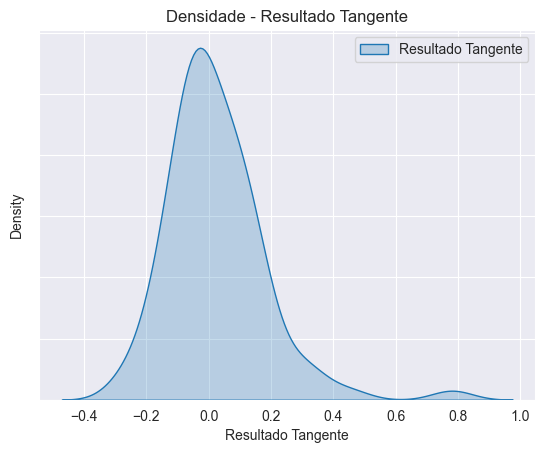

In [200]:
sns.kdeplot(retornos_df['Resultado Tangente'], fill=True, label="Resultado Tangente")
plt.gca().set_yticklabels([])
plt.title('Densidade - Resultado Tangente')
plt.legend()
plt.show()

In [201]:
retornos_df

,Periodo Final,Resultado Tangente,Resultado Minima Variancia,Resultado Ingenuo
0,2014-05-09,0.000617,0.002565,-0.006944
1,2014-06-09,-0.032657,-0.000421,-0.022879
2,2014-07-09,0.063957,0.001412,0.010316
3,2015-05-09,-0.135858,0.000007,-0.061475
4,2015-06-09,-0.109167,0.002781,-0.048100
...,...,...,...,...
78,2023-06-09,0.054673,-0.024395,0.019803
79,2023-07-09,-0.046836,-0.008215,-0.003970
80,2023-08-09,-0.158270,0.028597,-0.047097
81,2023-09-09,-0.008351,-0.043850,-0.021129


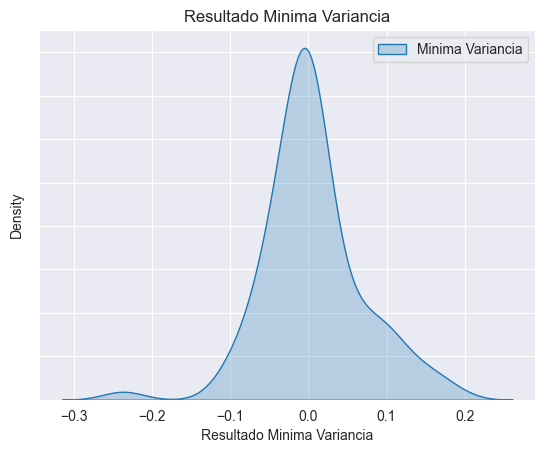

In [202]:
sns.kdeplot(retornos_df['Resultado Minima Variancia'], fill=True, label='Minima Variancia')
plt.title('Resultado Minima Variancia')
plt.gca().set_yticklabels([])
plt.legend()
plt.show()

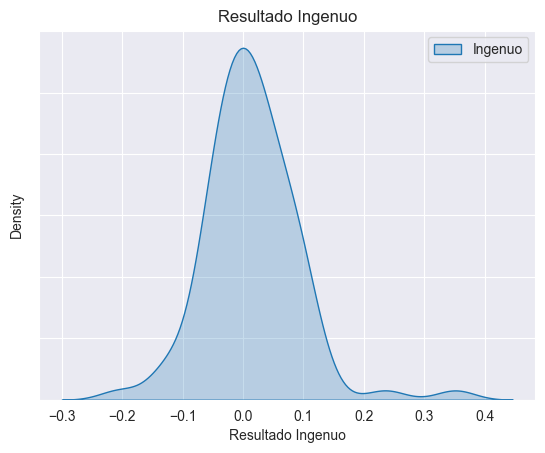

In [203]:
sns.kdeplot(retornos_df['Resultado Ingenuo'], fill=True, label='Ingenuo')
plt.title('Resultado Ingenuo')
plt.gca().set_yticklabels([])
plt.legend()
plt.show()

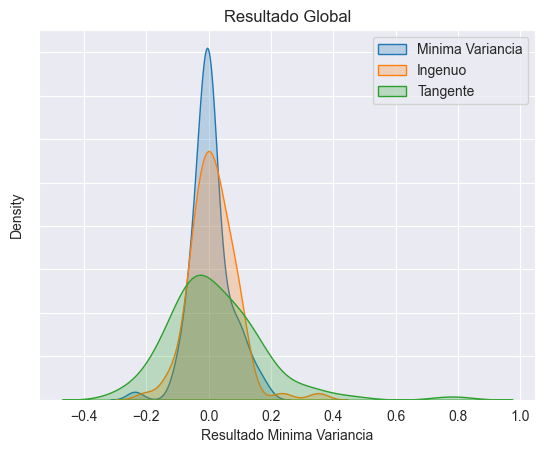

In [204]:
sns.kdeplot(retornos_df['Resultado Minima Variancia'], fill=True, label='Minima Variancia')
sns.kdeplot(retornos_df['Resultado Ingenuo'], fill=True, label='Ingenuo')
sns.kdeplot(retornos_df['Resultado Tangente'], fill=True, label='Tangente')
plt.title('Resultado Global')
plt.gca().set_yticklabels([])
plt.legend()
plt.show()

In [205]:
acumulado = pd.DataFrame(retornos_df.iloc[0]).T
for result in retornos_df[1:].iterrows():
    periodo = result[1]["Periodo Final"]
    res_tangente = (1 + acumulado['Resultado Tangente'].iloc[-1]) * (1 + result[1]["Resultado Tangente"]) - 1
    res_min_var = (1 + acumulado['Resultado Minima Variancia'].iloc[-1]) * (1 + result[1]["Resultado Minima Variancia"]) - 1
    res_ing = (1 + acumulado['Resultado Ingenuo'].iloc[-1]) * (1 + result[1]["Resultado Ingenuo"]) - 1
    acumulado.loc[len(acumulado)] = [periodo,res_tangente,res_min_var, res_ing]

In [206]:
acumulado

,Periodo Final,Resultado Tangente,Resultado Minima Variancia,Resultado Ingenuo
0,2014-05-09,0.000617,0.002565,-0.006944
1,2014-06-09,-0.03206,0.002143,-0.029664
2,2014-07-09,0.029846,0.003557,-0.019654
3,2015-05-09,-0.110066,0.003564,-0.07992
4,2015-06-09,-0.207218,0.006354,-0.124176
...,...,...,...,...
78,2023-06-09,2.475828,0.384262,1.634715
79,2023-07-09,2.313035,0.37289,1.624256
80,2023-08-09,1.78868,0.412151,1.500661
81,2023-09-09,1.76539,0.350228,1.447824


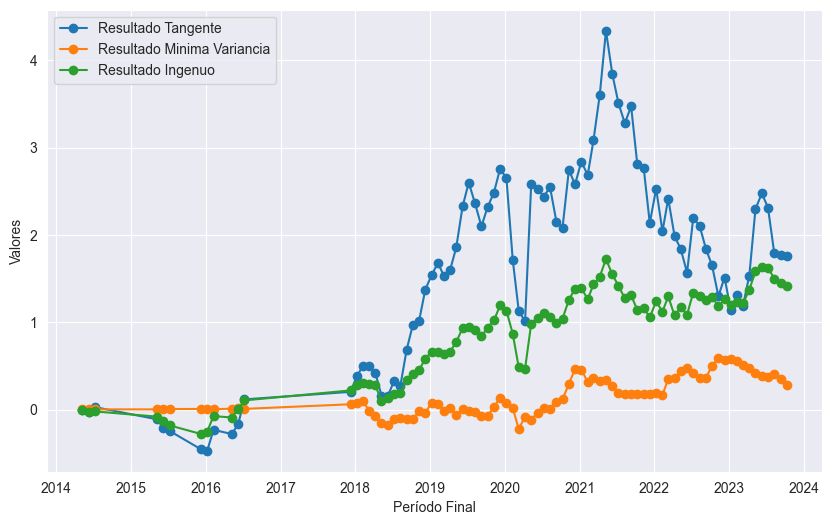

In [207]:
plt.figure(figsize=(10, 6))

# Plote a série "Resultado Tangente"
plt.plot(acumulado['Periodo Final'], acumulado['Resultado Tangente'], label='Resultado Tangente', marker='o')

# Plote a série "Resultado Minima Variancia"
plt.plot(acumulado['Periodo Final'], acumulado['Resultado Minima Variancia'], label='Resultado Minima Variancia', marker='o')

plt.plot(acumulado['Periodo Final'], acumulado['Resultado Ingenuo'], label='Resultado Ingenuo', marker='o')

# Configure os rótulos dos eixos e a legenda
plt.xlabel('Período Final')
plt.ylabel('Valores')
plt.legend()

# Exiba o gráfico
plt.show()

In [208]:
retornos_df

,Periodo Final,Resultado Tangente,Resultado Minima Variancia,Resultado Ingenuo
0,2014-05-09,0.000617,0.002565,-0.006944
1,2014-06-09,-0.032657,-0.000421,-0.022879
2,2014-07-09,0.063957,0.001412,0.010316
3,2015-05-09,-0.135858,0.000007,-0.061475
4,2015-06-09,-0.109167,0.002781,-0.048100
...,...,...,...,...
78,2023-06-09,0.054673,-0.024395,0.019803
79,2023-07-09,-0.046836,-0.008215,-0.003970
80,2023-08-09,-0.158270,0.028597,-0.047097
81,2023-09-09,-0.008351,-0.043850,-0.021129


In [209]:
entropia = {}
for ativo in dados_ativo.columns:
    entropia.update({ativo: entropia_periodo(dados_ativo[ativo], periodos)})
entropias = pd.DataFrame(entropia)
quartis = entropias.quantile(.75)
periodos_entropicos = entropias[entropias > quartis].notna()

In [210]:
periodos_entropicos

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,MULT3.SA,PETR3.SA,RENT3.SA,SBSP3.SA,SLCE3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA
2013-12-09,True,False,True,False,True,False,True,False,True,False,...,True,False,True,True,False,False,False,False,False,False
2014-01-09,True,False,False,False,False,True,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2014-02-09,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2014-03-09,False,False,True,False,False,True,False,False,True,True,...,False,False,True,False,False,False,True,True,True,False
2014-04-09,False,True,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2023-03-09,True,True,False,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2023-04-09,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
2023-05-09,True,True,False,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [211]:
expectativas = pd.DataFrame(expectativas)
expectativas['Diferenca'] = expectativas['Expectativa Retorno'] - expectativas['Realidade Retorno']
dif_exp_periodo = pd.DataFrame(expectativas['Diferenca'].tolist(), index=expectativas['Periodo Final'])

In [212]:
dif_exp_periodo

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,MULT3.SA,PETR3.SA,RENT3.SA,SBSP3.SA,SLCE3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA
Periodo Final,,,,,,,,,,,,,,,,,,,,,
2014-05-09,0.001457,0.006440,0.000236,0.007165,0.004690,0.000567,0.004882,-0.000510,0.003344,0.007235,...,0.003684,0.005555,0.000495,-0.000012,-0.001664,0.000091,-0.005824,0.005634,-0.001063,0.000357
2014-06-09,0.000832,0.003912,0.004681,0.004863,-0.001170,-0.002578,0.000451,0.003018,0.001198,0.006924,...,-0.000271,0.008940,0.003787,0.000485,0.005754,0.000087,0.009853,0.003327,-0.002932,-0.002410
2014-07-09,-0.001329,-0.002428,0.000036,-0.001369,-0.002466,-0.001999,0.000611,0.008992,0.000809,-0.001893,...,-0.002455,-0.002195,0.001806,0.011545,0.004297,0.000090,0.004924,-0.002093,-0.000466,-0.001860
2015-05-09,0.004794,0.009256,0.015501,0.006940,0.009139,0.005475,-0.000922,0.005497,0.012850,0.005483,...,0.006050,0.012237,0.003227,0.010616,0.001162,0.000110,-0.009325,0.005628,0.020506,0.009667
2015-06-09,-0.000573,0.004511,0.001046,-0.002583,-0.002360,0.009902,-0.000187,0.000720,0.015043,-0.000532,...,0.002528,0.011716,0.003758,0.005546,0.003645,0.000107,-0.001684,0.005535,0.009723,0.012073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,0.002549,0.005601,0.001988,0.001656,0.001102,-0.001464,-0.002882,0.000088,0.002851,0.001086,...,0.000318,0.002252,0.000845,-0.000287,-0.008846,0.002396,0.004855,0.000441,-0.000107,-0.001738
2023-07-09,0.002041,0.003467,0.006505,0.005980,0.011825,-0.004489,0.008657,0.006663,0.003472,-0.001408,...,0.002375,0.005573,0.007469,0.004562,-0.001992,-0.004471,0.000504,0.005205,0.003541,-0.005053
2023-08-09,0.002396,0.008864,0.001431,0.004921,0.012502,-0.000092,0.010621,-0.001675,0.000368,0.003140,...,0.003046,-0.002541,0.006764,-0.001753,0.006965,0.003435,0.002669,0.001944,0.000253,-0.002733


In [213]:
periodos_entropicos

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,MULT3.SA,PETR3.SA,RENT3.SA,SBSP3.SA,SLCE3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA
2013-12-09,True,False,True,False,True,False,True,False,True,False,...,True,False,True,True,False,False,False,False,False,False
2014-01-09,True,False,False,False,False,True,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2014-02-09,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2014-03-09,False,False,True,False,False,True,False,False,True,True,...,False,False,True,False,False,False,True,True,True,False
2014-04-09,False,True,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2023-03-09,True,True,False,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2023-04-09,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
2023-05-09,True,True,False,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [214]:
dados_entrop = dif_exp_periodo[periodos_entropicos].reset_index()
analise_entrop = pd.DataFrame({"mean":dados_entrop.mean(),
              "std":dados_entrop.std(),
              "max":dados_entrop.max(),
              "min":dados_entrop.min(),
              "median":dados_entrop.median()}).drop("Periodo Final", axis="rows")

dados_nao_entrop = dif_exp_periodo[~periodos_entropicos].reset_index()
analise_nao_entrop = pd.DataFrame({"mean":dados_nao_entrop.mean(),
              "std":dados_nao_entrop.std(),
              "max":dados_nao_entrop.max(),
              "min":dados_nao_entrop.min(),
              "median":dados_nao_entrop.median()}).drop("Periodo Final", axis="rows")

In [215]:
def plot_horizontal_bar_chart(data_dict, titulo, have_limit = False):
    labels = list(data_dict.keys())
    medians = [data_dict[label]['media'] for label in labels]
    std_dev = [data_dict[label]['std'] for label in labels]

    # Criar uma figura e eixo
    fig, ax = plt.subplots()

    # Definir a posição dos marcadores das medianas
    y_pos = np.arange(len(labels))

    # Lista de cores alternadas a cada duas barras
    colors = cycle(['r', 'g'])  # Adicione mais cores conforme necessário

    # Plotar as barras das medianas com cores alternadas
    for i in range(len(labels)):
        ax.barh(y_pos[i], medians[i], color=next(colors), align='center', alpha=0.5)

    # Plotar as linhas dos desvios padrões com as mesmas cores
    for i, label in enumerate(labels):
        color = next(colors)
        ax.plot([medians[i] - 2 * std_dev[i], medians[i] + 2 * std_dev[i]], [i, i], color=color, marker='o')

    # Personalizar o gráfico
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Valores')
    ax.set_title(titulo)
    
    if have_limit:
        plt.xlim(left=0)

    # Mostrar o gráfico
    plt.show()

In [216]:
sep_entropia = {}
for item in zip(analise_entrop.iterrows(), analise_nao_entrop.iterrows()):
    name = item[0][0]
    
    entr = item[0][1]
    nao_ent = item[1][1]
    
    sep_entropia.update({
        f'{name} Entropico': {
            "media": entr['mean'],
            "std": entr['std'],
            "max": entr['max'],
            "min": entr['median']
        }, f'{name} Não Entropica' : {
            "media": nao_ent['mean'],
            "std": nao_ent['std'],
            "max": nao_ent['max'],
            "min": nao_ent['median']
        }
    })

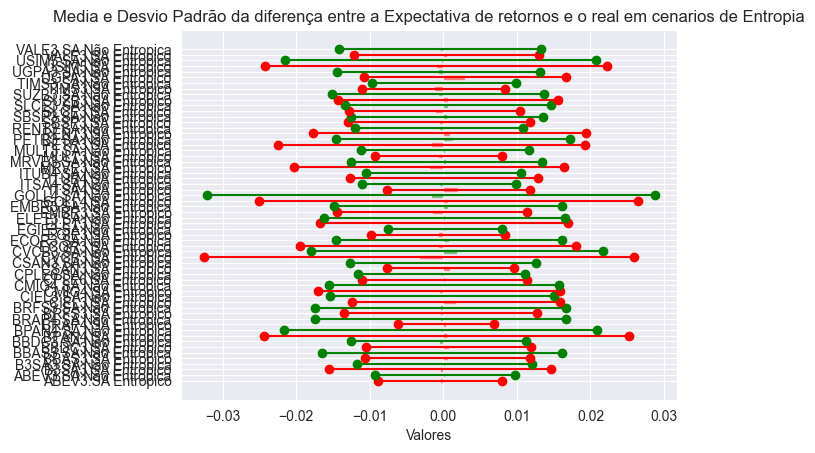

In [217]:
plot_horizontal_bar_chart(sep_entropia, "Media e Desvio Padrão da diferença entre a Expectativa de retornos e o real em cenarios de Entropia")

In [242]:
entr_dif = pd.DataFrame(sep_entropia)

In [245]:
colunas = entr_dif.columns

In [246]:
colunas

Index(['ABEV3.SA Entropico', 'ABEV3.SA Não Entropica', 'B3SA3.SA Entropico',
       'B3SA3.SA Não Entropica', 'BBAS3.SA Entropico',
       'BBAS3.SA Não Entropica', 'BBDC3.SA Entropico',
       'BBDC3.SA Não Entropica', 'BPAN4.SA Entropico',
       'BPAN4.SA Não Entropica', 'BRAP4.SA Entropico',
       'BRAP4.SA Não Entropica', 'BRFS3.SA Entropico',
       'BRFS3.SA Não Entropica', 'CIEL3.SA Entropico',
       'CIEL3.SA Não Entropica', 'CMIG4.SA Entropico',
       'CMIG4.SA Não Entropica', 'CPLE6.SA Entropico',
       'CPLE6.SA Não Entropica', 'CSAN3.SA Entropico',
       'CSAN3.SA Não Entropica', 'CVCB3.SA Entropico',
       'CVCB3.SA Não Entropica', 'ECOR3.SA Entropico',
       'ECOR3.SA Não Entropica', 'EGIE3.SA Entropico',
       'EGIE3.SA Não Entropica', 'ELET3.SA Entropico',
       'ELET3.SA Não Entropica', 'EMBR3.SA Entropico',
       'EMBR3.SA Não Entropica', 'GOLL4.SA Entropico',
       'GOLL4.SA Não Entropica', 'ITSA4.SA Entropico',
       'ITSA4.SA Não Entropica', 'ITUB4.SA 

In [264]:
colunas_sem = [f for f in colunas if 'Não' not in f]
colunas_com = [f for f in colunas if 'Não' in f]

In [275]:
print("Não entropicos")
entr_dif[colunas_sem].mean(axis=1)

Não entropicos


,ABEV3.SA Entropico,B3SA3.SA Entropico,BBAS3.SA Entropico,BBDC3.SA Entropico,BPAN4.SA Entropico,BRAP4.SA Entropico,BRFS3.SA Entropico,CIEL3.SA Entropico,CMIG4.SA Entropico,CPLE6.SA Entropico,...,MULT3.SA Entropico,PETR3.SA Entropico,RENT3.SA Entropico,SBSP3.SA Entropico,SLCE3.SA Entropico,SUZB3.SA Entropico,TIMS3.SA Entropico,UGPA3.SA Entropico,USIM5.SA Entropico,VALE3.SA Entropico
media,-4.697307e-04,-0.000453,0.000594,0.000739,0.000468,0.000370,-0.000391,0.001695,-0.000610,0.000191,...,-0.000684,-0.001636,0.000857,-0.000584,-0.001200,0.000633,-0.001304,0.002966,-0.000971,0.000457
std,4.190129e-03,0.007524,0.005625,0.005608,0.012403,0.003259,0.006570,0.007085,0.008247,0.005597,...,0.004317,0.010447,0.009280,0.006179,0.005785,0.007465,0.004862,0.006866,0.011641,0.006305
max,7.186008e-03,0.012814,0.012825,0.012304,0.033623,0.007540,0.014780,0.015111,0.015106,0.007480,...,0.008132,0.012782,0.013328,0.011545,0.013097,0.016156,0.007352,0.020045,0.017023,0.012073
min,-7.277921e-07,0.001430,0.000646,-0.000517,-0.001115,0.000523,0.000085,0.001907,0.000030,0.001086,...,-0.000970,0.000034,0.000845,-0.000343,-0.001787,-0.000739,-0.001557,0.000440,0.000678,0.000512


In [276]:
entr_dif[colunas_com].mean(axis=1)

,ABEV3.SA Não Entropica,B3SA3.SA Não Entropica,BBAS3.SA Não Entropica,BBDC3.SA Não Entropica,BPAN4.SA Não Entropica,BRAP4.SA Não Entropica,BRFS3.SA Não Entropica,CIEL3.SA Não Entropica,CMIG4.SA Não Entropica,CPLE6.SA Não Entropica,...,MULT3.SA Não Entropica,PETR3.SA Não Entropica,RENT3.SA Não Entropica,SBSP3.SA Não Entropica,SLCE3.SA Não Entropica,SUZB3.SA Não Entropica,TIMS3.SA Não Entropica,UGPA3.SA Não Entropica,USIM5.SA Não Entropica,VALE3.SA Não Entropica
media,0.000199,0.000194,-0.000191,-0.000658,-0.000389,-0.000409,-0.000452,-0.000222,0.000072,-0.000258,...,0.000207,0.001291,-0.000632,0.000479,0.000582,-0.000695,0.000030,-0.000700,-0.000373,-0.000462
std,0.004757,0.005955,0.008169,0.005968,0.010671,0.008533,0.008531,0.007629,0.007799,0.005698,...,0.005714,0.007978,0.005716,0.006537,0.006999,0.007217,0.004894,0.006890,0.010587,0.006856
max,0.009546,0.019407,0.018014,0.010214,0.016038,0.019088,0.012876,0.014080,0.015150,0.012448,...,0.011669,0.024771,0.012244,0.014982,0.015314,0.012168,0.009853,0.021329,0.022302,0.012883
min,0.000372,0.000373,0.000231,-0.000364,0.000024,-0.000154,0.000402,0.000797,0.000809,0.000607,...,0.000318,0.000340,-0.000727,0.000695,0.001401,0.000107,-0.000610,-0.000691,-0.001532,0.000183


In [218]:
expectativas_var = pd.DataFrame(expectativas)

In [219]:
expectativas_var['Diferenca'] = expectativas_var['Expectativa Variancia'] - expectativas_var['Realidade Variancia']
dif_exp_periodo = pd.DataFrame(expectativas_var['Diferenca'].tolist(), index=expectativas_var['Periodo Final'])

In [220]:
dif_exp_periodo

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,MULT3.SA,PETR3.SA,RENT3.SA,SBSP3.SA,SLCE3.SA,SUZB3.SA,TIMS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA
Periodo Final,,,,,,,,,,,,,,,,,,,,,
2014-05-09,0.000953,0.006803,0.000584,0.003441,0.002269,0.001958,-0.000960,-0.000090,0.000109,0.005240,...,0.002392,0.000122,0.001520,0.009005,0.003933,0.000690,0.001867,-0.002463,0.013144,0.000013
2014-06-09,-0.000166,0.001971,0.012947,0.003481,-0.001289,0.006163,0.003305,0.001645,-0.008818,0.002682,...,0.003035,0.007323,0.002400,0.013167,0.006017,0.000673,0.002528,0.001938,0.003534,0.002151
2014-07-09,-0.001119,-0.008164,0.003705,0.000619,-0.010063,0.008016,0.000274,-0.005088,0.003637,0.000520,...,-0.005497,-0.001170,0.004522,0.006724,0.000232,0.000684,-0.003643,-0.001550,-0.000454,0.004062
2015-05-09,-0.002171,0.006813,0.008222,-0.000987,0.006204,0.003214,0.004126,0.001924,-0.001583,0.000401,...,0.000314,0.010529,0.004629,0.001124,-0.001778,0.000839,-0.003495,0.002468,0.014679,0.016320
2015-06-09,0.003615,0.011239,0.007797,0.006797,0.012558,0.010481,-0.000742,-0.000027,-0.003095,0.001663,...,-0.004353,0.009736,0.007034,0.002641,0.008066,0.000825,-0.002748,0.005934,0.011122,0.017743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,0.001823,0.001526,-0.000566,0.004897,0.000484,0.005861,0.005993,0.002994,-0.003671,-0.004391,...,-0.003446,-0.002548,0.007519,0.007303,-0.004360,0.006313,0.000201,0.002771,0.010452,0.004530
2023-07-09,-0.003422,0.009934,0.004834,-0.001429,0.009226,0.004659,0.011728,-0.003544,0.003557,0.001771,...,0.000129,-0.001696,0.008575,0.004027,0.008244,0.004599,0.001207,0.009557,0.000684,0.001787
2023-08-09,0.001110,0.003306,0.003223,0.003158,0.003553,-0.003362,0.014853,0.002757,0.000843,0.002993,...,-0.001747,0.000858,-0.003168,-0.003097,-0.000773,0.002832,0.000761,0.006279,0.010025,-0.001529


In [221]:
dados_entrop_var = dif_exp_periodo[periodos_entropicos].reset_index()
analise_entrop_var = pd.DataFrame({"mean":dados_entrop.mean(),
              "std":dados_entrop.std(),
              "max":dados_entrop.max(),
              "min":dados_entrop.min(),
              "median":dados_entrop.median()}).drop("Periodo Final", axis="rows")

dados_nao_entrop_var = dif_exp_periodo[~periodos_entropicos].reset_index()
analise_nao_entrop_var = pd.DataFrame({"mean":dados_nao_entrop.mean(),
              "std":dados_nao_entrop.std(),
              "max":dados_nao_entrop.max(),
              "min":dados_nao_entrop.min(),
              "median":dados_nao_entrop.median()}).drop("Periodo Final", axis="rows")

In [222]:
sep_entropia_var = {}
for item in zip(analise_entrop_var.iterrows(), analise_nao_entrop_var.iterrows()):
    name = item[0][0]

    entr = item[0][1]
    nao_ent = item[1][1]

    sep_entropia_var.update({
        f'{name} Entropico': {
            "media": entr['mean'],
            "std": entr['std'],
            "max": entr['max'],
            "min": entr['median']
        }, f'{name} Não Entropica': {
            "media": nao_ent['mean'],
            "std": nao_ent['std'],
            "max": nao_ent['max'],
            "min": nao_ent['median']
        }
    })


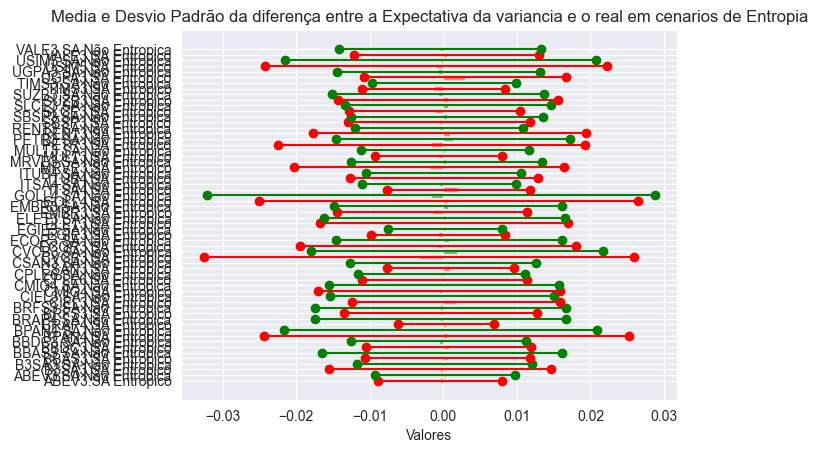

In [223]:
plot_horizontal_bar_chart(sep_entropia_var, "Media e Desvio Padrão da diferença entre a Expectativa da variancia e o real em cenarios de Entropia")

In [239]:
pd.DataFrame(sep_entropia_var).T

,media,std,max,min
ABEV3.SA Entropico,-0.000470,0.004190,0.007186,-7.277921e-07
ABEV3.SA Não Entropica,0.000199,0.004757,0.009546,3.720296e-04
B3SA3.SA Entropico,-0.000453,0.007524,0.012814,1.430271e-03
B3SA3.SA Não Entropica,0.000194,0.005955,0.019407,3.731024e-04
BBAS3.SA Entropico,0.000594,0.005625,0.012825,6.459270e-04
BBAS3.SA Não Entropica,-0.000191,0.008169,0.018014,2.309350e-04
BBDC3.SA Entropico,0.000739,0.005608,0.012304,-5.174415e-04
BBDC3.SA Não Entropica,-0.000658,0.005968,0.010214,-3.644346e-04
BPAN4.SA Entropico,0.000468,0.012403,0.033623,-1.115226e-03
BPAN4.SA Não Entropica,-0.000389,0.010671,0.016038,2.396726e-05


In [ ]:
rf = 0.027
retornos_ajus= []
pesos_aplicados_ajus = []
expectativas_ajus = []
i = 1
for periodo in periodos:
    try:

        periodo_final_teste = periodo + pd.DateOffset(months=1)
        periodo_final = periodo
        periodo_inicial = periodo - pd.DateOffset(months=3)
        
        serie_analisada = dados_ativo[(dados_ativo.index > periodo_inicial) & (dados_ativo.index < periodo_final)].dropna()
        serie_analisada = serie_analisada.pct_change().dropna()
        
        serie_entrop = periodos_entropicos[(periodos_entropicos.index >= periodo_final - pd.DateOffset(months=1)) & (periodos_entropicos.index < periodo_final)].dropna()
        
        cov = serie_analisada.cov().values
        aumento_risco = 1.2  
        
        ativos_aumentar_risco_indices = np.where(serie_entrop.any().values)[0]
        
        for i in ativos_aumentar_risco_indices:
            cov[i, i] *= aumento_risco
        
            for j in range(cov.shape[0]):
                if j != i:
                    cov[i, j] *= aumento_risco
                    cov[j, i] *= aumento_risco
        
        pesos_tan = portfolio_tangente(serie_analisada, rf, cov)
        pesos_min = minimum_variance_portfolio(serie_analisada, cov)
        
        serie_testada = dados_ativo[(dados_ativo.index > periodo_final) & (dados_ativo.index < periodo_final_teste)].dropna()
        serie_testada = serie_testada.pct_change().dropna()
    
        res_tan = aplicador_pesos(pesos_tan, serie_testada)
        res_min = aplicador_pesos(pesos_min, serie_testada)
        
        expectativas_ajus.append(
            {
                "Periodo Final": periodo_final,
                "Expectativa Retorno": np.mean(serie_analisada, axis=0),
                "Realidade Retorno": np.mean(serie_testada, axis=0),
                "Expectativa Variancia": np.std(serie_analisada),
                "Realidade Variancia": np.std(serie_testada)
            }
        )
    
        pesos_aplicados_ajus.append(
            {"Periodo Final": periodo_final,
             "Pesos Tangente": pesos_tan,
             "Peso Minima Variancia": pesos_min}
        )
    
        retornos_ajus.append(
            {"Periodo Final": periodo_final,
             "Resultado Tangente": res_tan,
             "Resultado Minima Variancia": res_min})
    except:
        print(f"Error {i}")
        i += 1

In [227]:
retornos_ajus_df = pd.DataFrame(retornos_ajus)

In [228]:
retornos_ajus_df

,Periodo Final,Resultado Tangente,Resultado Minima Variancia
0,2014-05-09,-0.011612,-0.004309
1,2014-06-09,-0.035784,0.013952
2,2014-07-09,0.061185,-0.005857
3,2015-05-09,-0.135858,-0.000216
4,2015-06-09,-0.109167,-0.005998
...,...,...,...
78,2023-06-09,0.031471,-0.038884
79,2023-07-09,-0.046836,0.022986
80,2023-08-09,-0.158270,0.029024
81,2023-09-09,-0.008351,-0.044024


In [229]:
acumulado_ajus = pd.DataFrame(retornos_ajus_df.iloc[0]).T
for result in retornos_df[1:].iterrows():
    periodo = result[1]["Periodo Final"]
    res_tangente = (1 + acumulado_ajus['Resultado Tangente'].iloc[-1]) * (1 + result[1]["Resultado Tangente"]) - 1
    res_min_var = (1 + acumulado_ajus['Resultado Minima Variancia'].iloc[-1]) * (1 + result[1]["Resultado Minima Variancia"]) - 1
    acumulado_ajus.loc[len(acumulado_ajus)] = [periodo,res_tangente,res_min_var]

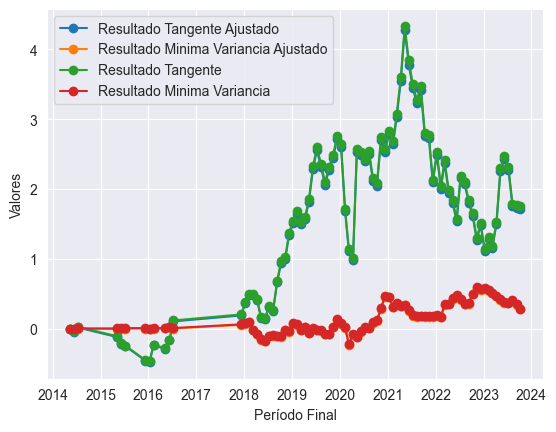

In [230]:
plt.plot(acumulado['Periodo Final'], acumulado_ajus['Resultado Tangente'], label='Resultado Tangente Ajustado', marker='o')

plt.plot(acumulado['Periodo Final'], acumulado_ajus['Resultado Minima Variancia'], label='Resultado Minima Variancia Ajustado', marker='o')

plt.plot(acumulado['Periodo Final'], acumulado['Resultado Tangente'], label='Resultado Tangente', marker='o')

plt.plot(acumulado['Periodo Final'], acumulado['Resultado Minima Variancia'], label='Resultado Minima Variancia', marker='o')

plt.xlabel('Período Final')
plt.ylabel('Valores')
plt.legend()

# Exiba o gráfico
plt.show()

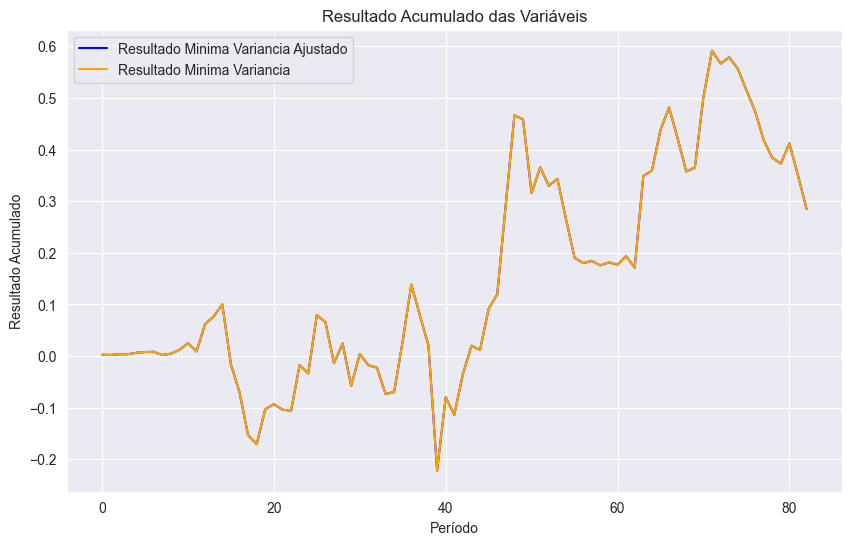

In [231]:

plt.figure(figsize=(10, 6))

# Plotando 'Resultado Minima Variancia' em azul

plt.plot(acumulado['Resultado Minima Variancia'], label='Resultado Minima Variancia Ajustado', color='blue')

# # Plotando 'Resultado Minima Variancia' em laranja
plt.plot(acumulado['Resultado Minima Variancia'], label='Resultado Minima Variancia', color='orange')

# Configurando rótulos e título
plt.xlabel('Período')
plt.ylabel('Resultado Acumulado')
plt.title('Resultado Acumulado das Variáveis')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

In [232]:
np.sum(acumulado_ajus['Resultado Minima Variancia'] - acumulado['Resultado Minima Variancia'])

-0.6548694250668503

In [236]:
np.sum(acumulado['Resultado Minima Variancia'] - acumulado_ajus['Resultado Minima Variancia'])

0.6548694250668503

In [234]:
acumulado

,Periodo Final,Resultado Tangente,Resultado Minima Variancia,Resultado Ingenuo
0,2014-05-09,0.000617,0.002565,-0.006944
1,2014-06-09,-0.03206,0.002143,-0.029664
2,2014-07-09,0.029846,0.003557,-0.019654
3,2015-05-09,-0.110066,0.003564,-0.07992
4,2015-06-09,-0.207218,0.006354,-0.124176
...,...,...,...,...
78,2023-06-09,2.475828,0.384262,1.634715
79,2023-07-09,2.313035,0.37289,1.624256
80,2023-08-09,1.78868,0.412151,1.500661
81,2023-09-09,1.76539,0.350228,1.447824


In [235]:
acumulado_ajus

,Periodo Final,Resultado Tangente,Resultado Minima Variancia
0,2014-05-09,-0.011612,-0.004309
1,2014-06-09,-0.043889,-0.004728
2,2014-07-09,0.017261,-0.003324
3,2015-05-09,-0.120942,-0.003317
4,2015-06-09,-0.216906,-0.000546
...,...,...,...
78,2023-06-09,2.433351,0.374771
79,2023-07-09,2.272547,0.363476
80,2023-08-09,1.7546,0.402468
81,2023-09-09,1.731595,0.34097
